<a href="https://colab.research.google.com/github/ChicagoDataScientist/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












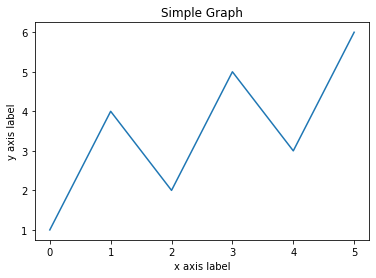

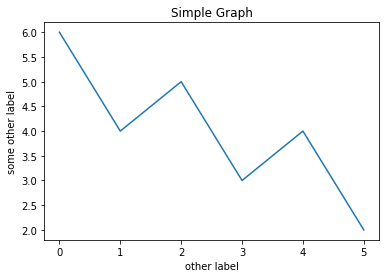

In [0]:
# Your Work Here
# Matplotlib Pyplot Syntax 
import numpy as np
import matplotlib.pyplot as plt


sample_data = [1,4,2,5,3,6]
plt.plot(sample_data)
plt.title ('Simple Graph')
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.show()

more_data = [6,4,5,3,4,2]
plt.plot(more_data)
plt.title ('Simple Graph')
plt.xlabel('other label')
plt.ylabel('some other label')
plt.show()

Text(0.5, 0, 'my x label')

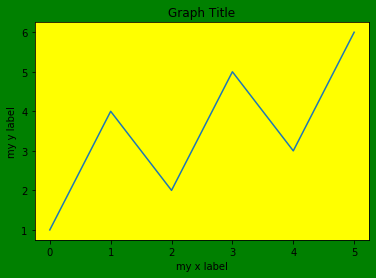

In [0]:
# Matplotlib's fig, ax Syntax

fig, ax = plt.subplots()
fig.patch.set(facecolor='green')

ax.plot(sample_data)
ax.set(facecolor='yellow')
ax.set_title('Graph Title')
ax.set_ylabel('my y label')
ax.set_xlabel('my x label')

In [0]:

from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

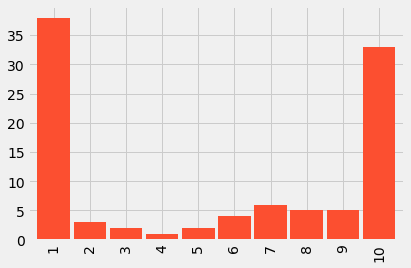

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

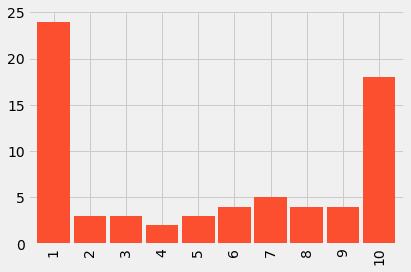

In [0]:

fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

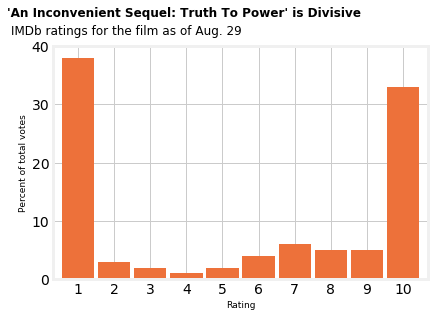

In [0]:
# Annotate with text
fig, ax = plt.subplots()
fig.patch.set(facecolor='white')
# fig.suptitle('Test Title')

# Set the bars
#ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, width=0.9, color='#ED713A')
fake.plot.bar(width=0.9, color='#ED713A')

ax.set(facecolor='white')

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is Divisive", 
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axis labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9);


# Fix the x and y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0);
ax.set_yticklabels(range(0,50,10), rotation=0)
ax.set_yticks(range(0,50,10));

# Annotate with text
list(range(1,11,1))

In [4]:
# Replicate graph from 538

from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2010/04/teapartyracism21.png?w=575'
example = Image(url=url, width=400)

display(example)

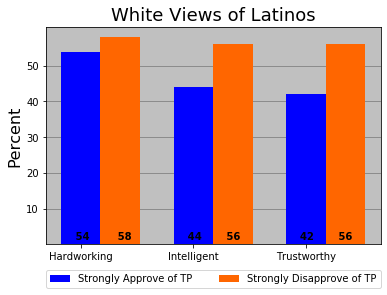

In [6]:
import matplotlib.pyplot as plt
import numpy as np
 
city=['Hardworking','Intelligent','Trustworthy']
opinion=['Strongly Approve of TP','Strongly Disapprove of TP']
pos = np.arange(len(city))
bar_width = 0.35
Strongly_Approve_Of_TP=[54,44,42]
Strongly_Disapprove_Of_TP=[58,56,56]
fig, ax = plt.subplots()
plt.bar(pos,Strongly_Approve_Of_TP,bar_width,color='#0000FF')
plt.bar(pos+bar_width,Strongly_Disapprove_Of_TP,bar_width,color='#FF6600')
plt.xticks(pos, city)

plt.ylabel('Percent', fontsize=16)
plt.title('White Views of Latinos',fontsize=18)

plt.legend(opinion, bbox_to_anchor=(0., -0.2, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
ax.set_axisbelow(True)

ax.grid(which='major', axis='y', color='gray')

fig.patch.set(facecolor='white')
ax.set_yticks(ticks= (10, 20, 30, 40, 50))

ax.set(facecolor='#C0C0C0')

ax.text(-.2, 1.3, "     54        58                44       56                 42       56",
        fontsize=10, color='black',fontweight='bold')

plt.show()


In [5]:
display(example)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here